**#Rastreador de Ações Com Python.#**

Importanto as Bibliotecas Necessárias.
Usaremos a "Yfinance" para obter os dados dos ativos financeiros e o "matplotlib" para gerar os gráficos.

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

**##Definir as ações da carteira##**

Aqui escolhemos as ações que desejamos rastrear e definimos seus simbolos como elementos de uma lista, se a ação for brasileira adicione ".SA" ao final. Cada ação terá o valor da moeda local.

In [2]:
acoes = ['AESB3.SA', 'AURE3.SA', 'CMIG3.SA', 'NEOE3.SA']

**Importar os dados dos ativos financeiros**

In [3]:
dados_acoes = yf.download(acoes, period='1d', start='2022-01-01')

[*********************100%%**********************]  4 of 4 completed


In [4]:
dados_acoes

Price       Adj Close                                       Close           \
Ticker       AESB3.SA   AURE3.SA   CMIG3.SA   NEOE3.SA   AESB3.SA AURE3.SA   
Date                                                                         
2022-01-03  10.728246        NaN  10.869288  13.797019  10.841678      NaN   
2022-01-04  10.619980        NaN  10.526996  13.570694  10.732267      NaN   
2022-01-05  10.344392        NaN  10.208724  13.309555  10.453765      NaN   
2022-01-06  10.186913        NaN   9.728314  13.153099  10.294621      NaN   
2022-01-07  10.147543        NaN  10.220735  12.898468  10.254835      NaN   
...               ...        ...        ...        ...        ...      ...   
2024-03-01  10.660000  12.450001  15.150000  21.270000  10.660000    12.85   
2024-03-04  10.470000  12.190000  14.920000  21.200001  10.470000    12.19   
2024-03-05  10.550000  12.180000  14.950000  21.190001  10.550000    12.18   
2024-03-06  10.550000  12.210000  14.870000  21.379999  10.550000    12.21   
2024-03-07  10.500000  12.130000  14.690000  21.730000  10.500000    12.13   

Price                                  High           ...        Low  \
Ticker       CMIG3.SA   NEOE3.SA   AESB3.SA AURE3.SA  ...   CMIG3.SA   
Date                                                  ...              
2022-01-03  13.923076  15.850000  11.110234      NaN  ...  13.830769   
2022-01-04  13.484615  15.590000  11.030662      NaN  ...  13.484615   
2022-01-05  13.076923  15.290000  10.851625      NaN  ...  13.076923   
2022-01-06  12.461538  14.980000  10.583069      NaN  ...  12.461538   
2022-01-07  13.092307  14.690000  10.364247      NaN  ...  12.315384   
...               ...        ...        ...      ...  ...        ...   
2024-03-01  15.150000  21.270000  10.710000    12.93  ...  15.110000   
2024-03-04  14.920000  21.200001  10.670000    12.45  ...  14.800000   
2024-03-05  14.950000  21.190001  10.590000    12.31  ...  14.830000   
2024-03-06  14.870000  21.379999  10.670000    12.28  ...  14.870000   
2024-03-07  14.690000  21.730000  10.590000    12.23  ...  14.490000   

Price                       Open                                  Volume  \
Ticker       NEOE3.SA   AESB3.SA AURE3.SA   CMIG3.SA   NEOE3.SA AESB3.SA   
Date                                                                       
2022-01-03  15.730000  11.010769      NaN  14.476923  16.020000   851355   
2022-01-04  15.550000  10.931197      NaN  14.030769  15.840000   826120   
2022-01-05  15.250000  10.742213      NaN  13.592307  15.520000  1083497   
2022-01-06  14.880000  10.543284      NaN  13.230769  15.220000   804404   
2022-01-07  14.690000  10.304568      NaN  12.346153  14.900000   823405   
...               ...        ...      ...        ...        ...      ...   
2024-03-01  21.080000  10.440000    12.87  15.140000  21.600000  2532100   
2024-03-04  21.090000  10.650000    12.45  15.180000  21.270000  1277800   
2024-03-05  20.990000  10.470000    12.22  14.920000  21.100000  1775500   
2024-03-06  21.059999  10.600000    12.20  14.950000  21.190001  2486100   
2024-03-07  21.219999  10.550000    12.21  14.910000  21.379999  1135400   

Price                                    
Ticker       AURE3.SA CMIG3.SA NEOE3.SA  
Date                                     
2022-01-03        NaN   841879  3231300  
2022-01-04        NaN   688739  1857500  
2022-01-05        NaN   270789  1427900  
2022-01-06        NaN   505569  1766800  
2022-01-07        NaN   585909  1622800  
...               ...      ...      ...  
2024-03-01  6803000.0   355700   878100  
2024-03-04  6936300.0   400600  1332300  
2024-03-05  4003900.0   254800  1068100  
2024-03-06  4458500.0   110000  1053600  
2024-03-07  2017400.0   232400   677900  

[544 rows x 24 columns]

**Criando Primeiro Gráfico**

Vamos plotar os preços de fechamento das ações no gráfico.

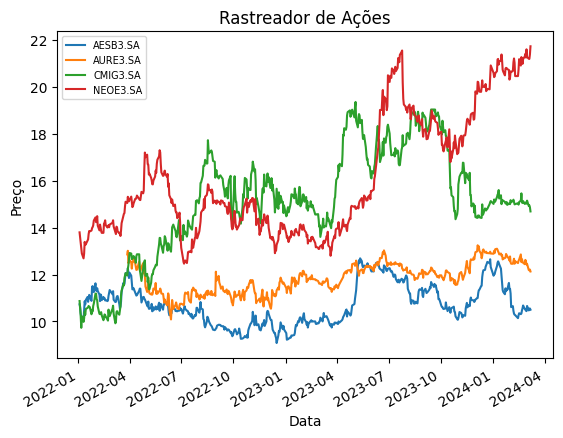

In [5]:
dados_acoes['Adj Close'].plot()
plt.xlabel('Data')
plt.ylabel('Preço')
plt.title('Rastreador de Ações')
plt.legend(fontsize=7)
plt.show()

**Normalizando os Preços**

Quando estamos analisando ativos de paises diferentes com moedas diferentes, precisamos normalizar para que todos partam do mesmo ponto, a fim de obter uma comparação mais precisa.
O código abaixo normaliza os preços de fechamento das ações dividindo-os pelo preço de fechamento inicial de cada ação. Em seguida cria um novo gráfico com os preços normalizados.

**Quando normalizamos temos condições de saber qual ação performou melhor idenpendente do setor, moeda ou valor da ação.**

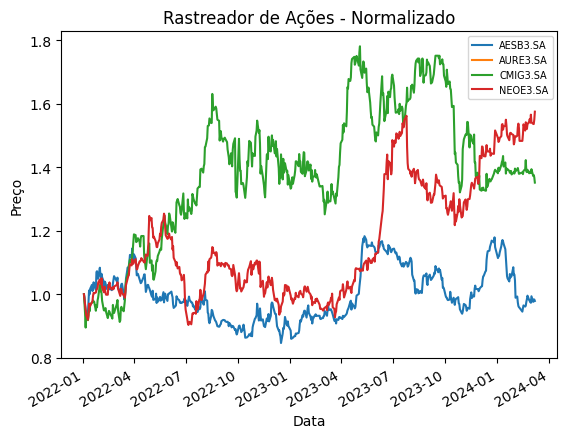

In [6]:
dados_normalizados = dados_acoes['Adj Close'] / dados_acoes['Adj Close'].iloc[0]
dados_normalizados.plot()
plt.xlabel('Data')
plt.ylabel('Preço')
plt.title('Rastreador de Ações - Normalizado')
plt.legend(fontsize=7)
plt.show()